<a href="https://colab.research.google.com/github/FelixLeChat92/MermaidGen-Colab-Jupyter/blob/main/Mermaid_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importation
(execution obligatoire)

In [1]:
import base64
import json
import zlib
from IPython.display import SVG, Image
import requests

#Section à modifier en fonction du diagramme
(execution obligatoire)

In [3]:
# Exemple d'utilisation
mermaid_code = '''
mindmap
  root((Médicaments de l'HTA))
    Diurétiques
      Thiazidiques
        Hydrochlorothiazide
        Indapamide
      Diurétiques de l'anse
        Furosémide
        Bumétanide
      Épargneurs de potassium
        Spironolactone
        Éplérénone
    Bêta-bloquants
      Aténolol
      Métoprolol
      Bisoprolol
    Inhibiteurs de l'enzyme de conversion (IEC)
      Captopril
      Énalapril
      Ramipril
    Antagonistes des récepteurs de l'angiotensine II (ARA II)
      Losartan
      Valsartan
      Candésartan
    Inhibiteurs calciques
      Dihydropyridines
        Amlodipine
        Nifédipine
      Non-dihydropyridines
        Diltiazem
        Vérapamil
    Antihypertenseurs centraux
      Méthyldopa
      Clonidine
      Moxonidine
    Vasodilatateurs
      Hydralazine
      Minoxidil
'''

from IPython.display import SVG

#Génération du lien mermaid.live (éditeur en ligne)
(execution indépendante)

In [4]:
def js_btoa(data):
    return base64.b64encode(data)

def pako_deflate(data):
    compress = zlib.compressobj(9, zlib.DEFLATED, 15, 8, zlib.Z_DEFAULT_STRATEGY)
    compressed_data = compress.compress(data)
    compressed_data += compress.flush()
    return compressed_data

def genPakoLink(graphMarkdown: str):
    jGraph = {"code": graphMarkdown, "mermaid": {"theme": "standard"}}
    byteStr = json.dumps(jGraph).encode('utf-8')
    deflated = pako_deflate(byteStr)
    dEncode = js_btoa(deflated)
    link_code = dEncode.decode('ascii')
    return link_code

mermaid_link = genPakoLink(mermaid_code)
print("Lien mermaid.live : ")
print('http://mermaid.live/edit#pako:' + mermaid_link)


Lien mermaid.live : 
http://mermaid.live/edit#pako:eNp1U01PwzAM/StRL2wSSFzh1m0gKjEOgHbaxSRhtZTYWZKibYj/Tvq1pUic2rzYL/bz83chWeniXhRbskjKgtuSEJ45zmbrbXN7q+8USrCaYhBKC3P19F7O522QECtsfB8Tcd/o0KNCvNcIJ1QTTIino/Isa8OeYx+gL5cVKXBgM+wvef86UMiyHhvPoQ+yE7pFY4dcoOyixeSdA78j3fiO0nGEEDDFn5PfHHomNiAjU0Y6ZJueeSiOziGLDoAINx+G9w0kxcbcMo7Bhs0IDvJGdj6HFxgmSEU1fmAc6zVXmk5Hq9t/yfSlfUAmMaselvORYgmuZUUz7ZvAQI6+Jr0v55Ii7JgwxE7rIIYGpXbZ40A75KgpIGlRVWJWvpbpe376mQP4JPp43oCZAksg1RPneN6kBCMn1llh3VrHHX3yFOWWKq1hhQ7zKb3g5+jb/OKF6Ub9S7RCE5MldeaCzTDmzpYXjRKF075VoC82LYaH5vB3qPXRKHZw7tokZVVWzpoPE2QDIXVikns6EcawdmfS1E55JhIfUmYqqbgWhdXeAqq0wt9FrLXtljkkYRV4Vfz8/AJrZT0U


#Génération à partir de kroki.io (SVG, qualité haute)
(execution indépendante)

https://kroki.io/mermaid/svg/eNp1UkFy2zAMvPsVvMU-5BGy3U400-SQZHxHRNbCDAgwJJWx_YM8Rf2GPlZItiX20JOEBbEAFrvyyNZDWBkTRfJ6_Tz0FhvwjnMy1hl6eHqvNhvNG7PHLg59xs_OpQkw5r1FuKAtIWOezjZK05JEyde8m3M1WwjgF6gkvTYETsv7n12UNPS-5Nh2XiuAF2z4DhCP7Lo4cQTJkBJ2fi55CxiFhaDJwguT1tHQa3--o9vhT4bHD5LPDlSC28sqj09I6BarSllCLJAtphKoucUPzPeB6MHx5ezd-N8If7mYUNis6x-7zY1gB2GkRJpXYiAogFdVbQ4rznAUxpQn1ZLRHRoXiobAR5TsOCE7U9dmXb1W-r23-yUJomp4Cw9A_8Q7YDv0BVQu1AA15cX32I4XD-eoTuDCCJUnsRiwUPwFf48OK7AX4Uf7P4Y9UlYHueWSB73X5KBZCK0NLo6rXqdT60boTsWp2jNZCXDfjVQ4uwzwLKcSOEDSoQkyTNuuFk_rPS5FGbKctIxWfwGzdAnh
L'image SVG a été enregistrée sous le nom 'fwGzdAnh.svg'


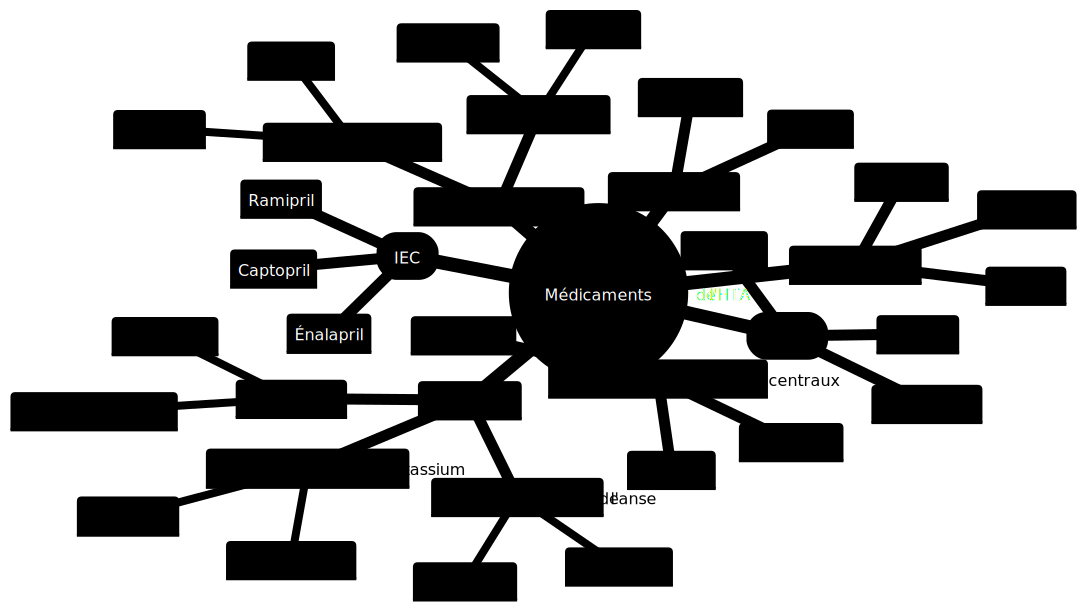

In [5]:
import sys
import base64
import zlib
from IPython.display import SVG


def encode_mermaid_to_kroki_url(mermaid_diagram, compression_level=9):
    # Compresser le diagramme Mermaid avec zlib
    mermaid_compressed = zlib.compress(mermaid_diagram.encode('utf-8'), compression_level)

    # Encoder le diagramme compressé en base64 URL-safe
    mermaid_base64 = base64.urlsafe_b64encode(mermaid_compressed).decode('utf-8')

    # Construire l'URL Kroki complète
    kroki_url = f"https://kroki.io/mermaid/svg/{mermaid_base64}"

    return kroki_url

kroki_link = encode_mermaid_to_kroki_url(mermaid_code)
print(kroki_link)

string = kroki_link[-8:]
filename = string[:8] + ".svg"

response = requests.get(kroki_link)
if response.status_code == 200:
  # Enregistrer l'image SVG dans un fichier
  with open(filename, "wb") as file:
    file.write(response.content)
  print(f"L'image SVG a été enregistrée sous le nom '{filename}'")
else:
  print("Erreur lors du téléchargement de l'image SVG")
SVG(response.text)




# Génération à partir de mermaid.ink  
(execution indépendante pour chaque code)


##SVG - Haute Qualité

In [ ]:
def mermaid_ink_string(graph):
  graphbytes = graph.encode("utf-8")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("utf-8")
  string = base64_string
  return string

string = mermaid_ink_string(mermaid_code)
url_image_svg = "https://mermaid.ink/svg/" + string
print("lien vers l'image mermaid : " + url_image_svg)

filename = string[:8] + ".svg"

response = requests.get(url_image_svg)
if response.status_code == 200:
  # Enregistrer l'image SVG dans un fichier
  with open(filename, "wb") as file:
    file.write(response.content)
  print(f"L'image SVG a été enregistrée sous le nom '{filename}'")
else:
  print("Erreur lors du téléchargement de l'image SVG")
SVG(response.text)

##PNG - Qualité basse

In [ ]:
def mermaid_ink_string(graph):
  graphbytes = graph.encode("utf-8")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("utf-8")
  string = base64_string
  return string

string = mermaid_ink_string(mermaid_code)

url_image_png = "https://mermaid.ink/img/" + string
print("lien vers l'image mermaid : " + url_image_png)

filename = string[:8] + ".png"

response = requests.get(url_image_png)

display(Image(url=url_image_png))

response = requests.get(url_image_png)
if response.status_code == 200:
  # Enregistrer l'image SVG dans un fichier
  with open(filename, "wb") as file:
    file.write(response.content)
  print(f"L'image SVG a été enregistrée sous le nom '{filename}'")
else:
  print("Erreur lors du téléchargement de l'image PNG")